In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [208]:
import os
#print(os.getcwd())
#print(os.listdir(os.getcwd()))
heart = pd.read_csv(r'C:\Users\user\Documents\Data Science\ADS\2887ADS Assignment 7\heart.csv')
insurance = pd.read_csv(r'C:\Users\user\Documents\Data Science\ADS\2887ADS Assignment 7\insurance.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [209]:
#renaming the column target in the dataframe heart
heart.rename(columns = {'target':'heart disease'}, inplace = True)

In [210]:
#map encoding the gender category in the dataframe insurance

#insurance.sex.unique() #- check the unique values in the column; ['female', 'male']
#display(insurance.sex.isnull().any()) - check for any missing values before transforming the data; No missing values

insurance["sex"] = insurance["sex"].map({'female':0, 'male':1})
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [6]:
#Alternative to mapping is Label encoding: 

#from sklearn.preprocessing import LabelEncoder
#lbl_enc = LabelEncoder()
#insurance["sex"] = lbl_enc.fit_transform(insurance["sex"])

#Disadvantage: the numeric values can be misinterpreted by algorithms 
#as having some sort of hierarchy/order in them. 

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [8]:
insurance.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [9]:
#Checking for any null/Nan values
display(insurance.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
#Check the different types of regions in the dataframe
insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
#Check types of smokers
insurance.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
insurance.shape

(1338, 7)

### Insurance DataFrame
1. There are no missing values
2. 4 numerical data, 1 categorical-numerical(sex) and 2 categorical datasets(smoker,region)-which can also be converted to categorical-numerical when creating an ML model 
3. The oldest is 64 and the yougest is 18 
4. There are underweight patients with bmi as low as 15 and pateints with morbid obesity with bmi as high as 53.13(very high bmi,feels too skewed)
5. The Insuance dataframe has 1338 record entries(individuals) i.e rows and 7 columns

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age              303 non-null int64
sex              303 non-null int64
cp               303 non-null int64
trestbps         303 non-null int64
chol             303 non-null int64
fbs              303 non-null int64
restecg          303 non-null int64
thalach          303 non-null int64
exang            303 non-null int64
oldpeak          303 non-null float64
slope            303 non-null int64
ca               303 non-null int64
thal             303 non-null int64
heart disease    303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
#check for any missing values
display(heart.isnull().any())

age              False
sex              False
cp               False
trestbps         False
chol             False
fbs              False
restecg          False
thalach          False
exang            False
oldpeak          False
slope            False
ca               False
thal             False
heart disease    False
dtype: bool

In [16]:
heart.shape

(303, 14)

In [17]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart disease'],
      dtype='object')

### Heart DataFrame

1. No misisng values
2. Only has numerical data, perfect for creating an ML model
3. Oldest individual in this dataframe is 77, youngest 29
4. The dataframe has 303 individual entries i.e rows and 14 columns

In [18]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [211]:
df_all = pd.merge(heart, insurance, on=['age','sex'], how='inner') 
df_all


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0,no,northwest,13770.09790
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,35.090,0,yes,southeast,47055.53210
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.470,0,no,southeast,13405.39030
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,36.765,0,no,northeast,13981.85035
4,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.325,3,no,northwest,15555.18875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,32.100,3,no,southwest,14007.22200
3419,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,31.350,0,no,northwest,12622.17950
3420,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,26.695,3,no,northwest,14382.70905
3421,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,27.500,0,no,southwest,12233.82800


In [212]:
df_all = df_all.drop_duplicates(subset=['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','heart disease'])
df_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.31,0,no,northwest,13770.0979
11,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0,28.31,0,no,northwest,13770.0979
22,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0,28.31,0,no,northwest,13770.0979
33,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0,28.31,0,no,northwest,13770.0979
44,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29.83,2,no,northeast,6406.4107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,39.90,0,yes,southwest,48173.3610
3374,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0,39.90,0,yes,southwest,48173.3610
3386,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,39.10,2,no,southwest,14235.0720
3398,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0,39.10,2,no,southwest,14235.0720


In [213]:
df_all = df_all.drop_duplicates(subset=['bmi','children','smoker','region','charges'])
df_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0,no,northwest,13770.09790
44,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29.830,2,no,northeast,6406.41070
57,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,32.965,0,no,northwest,6571.02435
109,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40.300,0,no,southwest,10602.38500
213,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,31.160,0,yes,northwest,43578.93940
265,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,34.010,0,no,northwest,11356.66090
434,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,39.820,0,no,southeast,11090.71780
473,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,27.400,2,no,southwest,7726.85400
590,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,32.205,3,no,northeast,11488.31695
758,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,33.630,1,no,northwest,10825.25370


In [214]:
df_all.shape

(58, 19)

In [215]:
#df_all.age.hist()
#plt.title("Age distribution")
#plt.xlabel('age')
#plt.ylabel('count')


In [112]:
#plt.figure(figsize=(14,6))
#sns.barplot(x=heart.age, y=heart.age.value_counts())
#plt.ylabel('Number of Individuals')

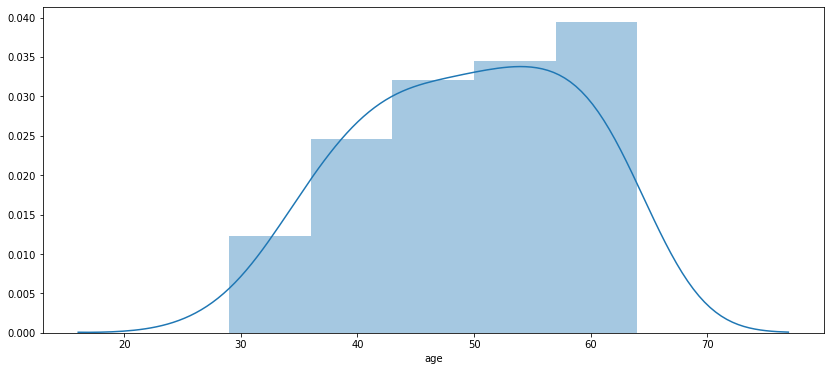

In [216]:
plt.figure(figsize=(14,6))
sns.distplot(df_all.age)

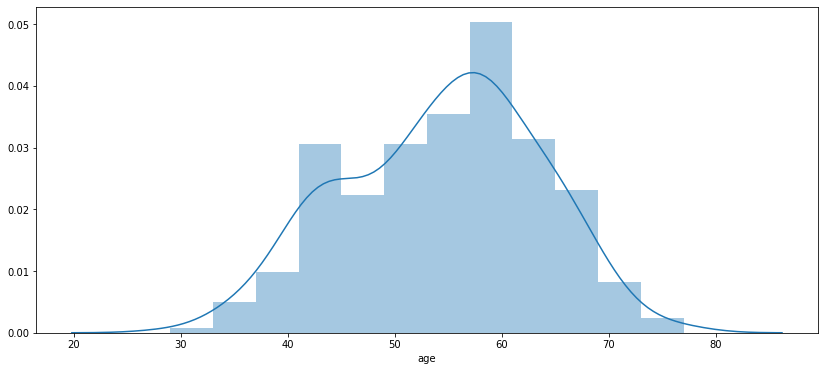

In [217]:
plt.figure(figsize=(14,6))
sns.distplot(heart.age)

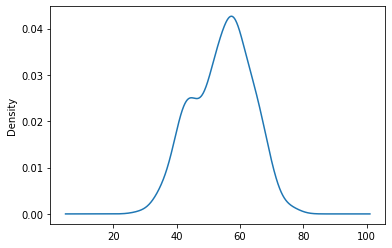

In [218]:
#heart.age.plot(kind='kde')

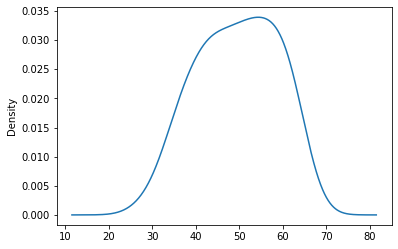

In [219]:
#df_all.age.plot(kind='kde')

In [123]:
#sns.scatterplot(df_all['age'])

In [114]:
#plt.figure(figsize=(20, 6))
# Bar chart showing average score for racing games by platform
#sns.barplot(x=df_all.age,y=df_all.age.value_counts())
# Add label for horizontal axis
#plt.xlabel("")
# Add label for vertical axis
#plt.title("Average Score for Racing Games, by Platform")

In [110]:
#plt.figure(figsize=(20, 6))
# Bar chart showing average score for racing games by platform
#sns.barplot(x=df_all.age)
# Add label for horizontal axis
#plt.xlabel("")
# Add label for vertical axis
#plt.title("Average Score for Racing Games, by Platform")

In [141]:
display(df_all.isnull().any())

age              False
sex              False
cp               False
trestbps         False
chol             False
fbs              False
restecg          False
thalach          False
exang            False
oldpeak          False
slope            False
ca               False
thal             False
heart disease    False
bmi              False
children         False
smoker           False
region           False
charges          False
dtype: bool

In [125]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 3410
Data columns (total 19 columns):
age              58 non-null int64
sex              58 non-null int64
cp               58 non-null int64
trestbps         58 non-null int64
chol             58 non-null int64
fbs              58 non-null int64
restecg          58 non-null int64
thalach          58 non-null int64
exang            58 non-null int64
oldpeak          58 non-null float64
slope            58 non-null int64
ca               58 non-null int64
thal             58 non-null int64
heart disease    58 non-null int64
bmi              58 non-null float64
children         58 non-null int64
smoker           58 non-null object
region           58 non-null object
charges          58 non-null float64
dtypes: float64(3), int64(14), object(2)
memory usage: 11.6+ KB


In [220]:
numerical_continuous = df_all.select_dtypes('float64').columns
numerical_continuous



Index(['oldpeak', 'bmi', 'charges'], dtype='object')

In [221]:
df_num_con = df_all[numerical_continuous]
df_num_con

,oldpeak,bmi,charges
0,2.3,28.310,13770.09790
44,3.5,29.830,6406.41070
57,1.4,32.965,6571.02435
109,0.8,40.300,10602.38500
213,0.6,31.160,43578.93940
265,0.4,34.010,11356.66090
434,1.3,39.820,11090.71780
473,0.0,27.400,7726.85400
590,0.5,32.205,11488.31695
758,1.2,33.630,10825.25370


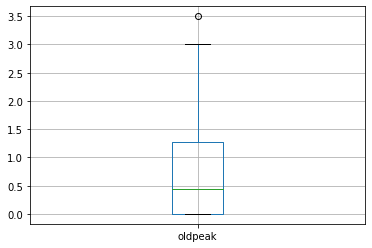

In [222]:
#use a boxplot to identify any outliers
#If there are no circles or asterisks on either end of the box plot, this is an indication that no outliers are present.

df_num_con.boxplot(column=numerical_continuous[0])


#oldpeak has one outlier

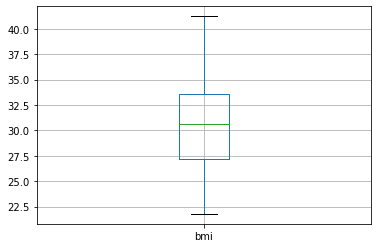

In [223]:
df_num_con.boxplot(column=numerical_continuous[1])

#bmi has no outliers

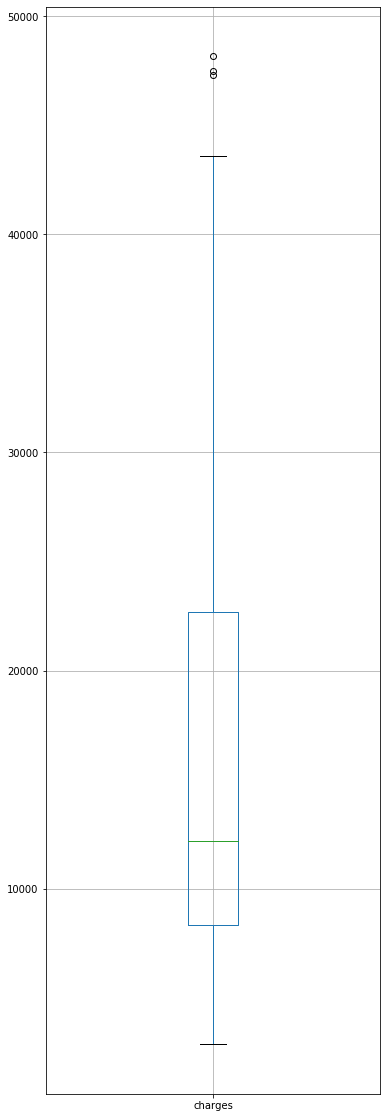

In [224]:
plt.figure(figsize=(6,20))
df_num_con.boxplot(column=numerical_continuous[2])

#charges has 3 outliers

In [225]:
from scipy import stats
zscore = np.abs(stats.zscore(df_num_con))
print(zscore)

[[1.96318749 0.44714236 0.30127051]
 [3.42143561 0.14914886 0.8995742 ]
 [0.8695014  0.46546274 0.88619925]
 [0.14037733 1.90347743 0.55864895]
 [0.10266402 0.11159546 2.12071447]
 [0.34570537 0.67033327 0.49736362]
 [0.74798072 1.80937422 0.51897164]
 [0.83178808 0.62554636 0.79228745]
 [0.2241847  0.31646599 0.48666649]
 [0.62646004 0.5958349  0.54054075]
 [0.58874673 2.0858024  0.52360748]
 [0.10266402 0.05700613 0.76061387]
 [1.3555841  1.15487692 1.03095589]
 [0.38341869 0.24196761 0.31449235]
 [1.11254275 0.54124557 0.18454976]
 [0.99102207 0.6333883  0.72083868]
 [0.2241847  0.14914886 1.03244428]
 [0.83178808 1.16663983 0.16554999]
 [0.38341869 0.19197528 0.39978621]
 [0.8695014  0.83825883 0.90095813]
 [0.10266402 1.21075071 0.48408411]
 [0.62646004 0.11159546 0.57005699]
 [0.8695014  0.55858571 0.75054615]
 [0.83178808 0.04101805 0.43653465]
 [0.99102207 1.39963316 0.61753751]
 [0.58874673 0.50791735 0.49483659]
 [2.81383223 1.50874421 0.29417063]
 [0.34570537 1.51168493 0.46

In [226]:
threshold = 3
print(np.where(zscore > 2))

(array([ 1,  4, 10, 26, 35, 46, 55, 55], dtype=int64), array([0, 2, 1, 0, 2, 2, 0, 2], dtype=int64))


In [227]:
df_num_con.shape

(58, 3)

In [228]:

df_clean= df_num_con[(zscore < 2).all(axis=1)]
df_clean.shape

(51, 3)

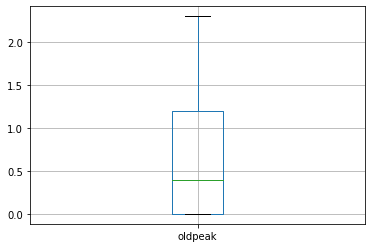

In [231]:
df_clean.boxplot(column=numerical_continuous[0])

In [232]:
numerical_discrete = df_all.select_dtypes('int64').columns
numerical_discrete

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'heart disease', 'children'],
      dtype='object')

In [234]:
categorical = df_all.select_dtypes('object').columns
categorical

Index(['smoker', 'region'], dtype='object')